In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Para realizar test de hipótesis
from scipy.stats import ttest_ind
from scipy.stats import norm
import scipy.stats as scs
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway
from scipy.stats import pearsonr

In [3]:
# Load the uploaded CSV file to analyze its contents
listings_detail2 = pd.read_csv(r'C:\Users\annie\OneDrive\Escritorio\Bootcamp Analisis de Datos\Visual\Módulo 2\Proyecto_M2\listings_detail.csv')
# Display the first few rows to understand its structure
listings_detail2.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,25436,https://www.airbnb.com/rooms/25436,20240630022825,2024-06-30,previous scrape,In the forest Sea view Two minutes to the city.,Our house is in Bebek Koru. If you want villag...,Clean and elegand friends . U can find everyth...,https://a0.muscache.com/pictures/b64c3ef0-2256...,105823,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,28318,https://www.airbnb.com/rooms/28318,20240630022825,2024-06-30,city scrape,Cosy home overlooking Bosphorus,NaN,Close to Bosphorus University<br />Close to Be...,https://a0.muscache.com/pictures/76617600/0ab5...,121721,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,607344,https://www.airbnb.com/rooms/607344,20240630022825,2024-06-30,city scrape,Blue Suites by V 2 Sultanahmet,The best place you can stay in the very heart ...,The location is the very heart of the center o...,https://a0.muscache.com/pictures/7972946/68fdf...,2751565,...,5.0,5.0,4.82,Exempt,t,3,3,0,0,0.44


In [4]:
#Rendimiento por vecindario 
# Convert 'price' to numeric (removing currency symbols and formatting issues)
listings_detail2['price'] = (
    listings_detail2['price']
    .replace('[\$,]', '', regex=True)
    .astype(float, errors='ignore')
)

# Calculate average price, reviews per month, and review scores
performance_summary = listings_detail2.groupby('neighbourhood_cleansed').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    average_reviews_per_month=('reviews_per_month', 'mean'),
    average_review_score=('review_scores_value', 'mean'),
    count_listings=('id', 'count')
).reset_index()

performance_summary = performance_summary.sort_values(by='average_price', ascending=False)

from IPython.display import display
display(performance_summary)


,neighbourhood_cleansed,average_price,median_price,average_reviews_per_month,average_review_score,count_listings
29,Sariyer,17306.031034,3000.0,0.766102,4.649153,311
31,Silivri,9713.138614,5143.0,0.627209,4.406512,101
27,Pendik,9638.198502,1600.0,0.845617,4.569317,312
9,Besiktas,7950.073268,2157.0,1.019280,4.593486,1880
13,Buyukcekmece,7696.845000,3000.0,0.530633,4.503544,208
4,Bagcilar,7064.603478,2105.0,0.617371,4.565610,625
10,Beykoz,6621.928571,2429.0,0.785341,4.491932,177
30,Sile,6560.007595,4000.0,0.861004,4.463992,445
20,Gaziosmanpasa,5972.766667,1851.5,0.621200,4.599400,131
14,Catalca,5571.307692,3000.0,0.772000,4.405000,39


In [5]:
# Eliminar columnas irrelevantes(listing_url, scrape_id, picture_url, host_url, host_thumbnail_url, host_picture_url,host_neighbourhood,bathrooms_text,calendar_last_scraped, first_review, last_review)
#Primero debo definir las columnas que se quieren eliminar 
columns_to_drop=['listing_url', 'scrape_id', 'picture_url','host_url','host_thumbnail_url','host_picture_url','host_neighbourhood','bathrooms_text','calendar_last_scraped', 'first_review', 'last_review']
#Eliminar las columnas con el método drop
listings_detail2.drop(columns=columns_to_drop, inplace=True)

In [ ]:

# Definir un puntaje de rendimiento basado en múltiples factores
performance_summary['performance_score'] = (
    performance_summary['average_price'] * 0.5 +  # Peso para precio promedio
    performance_summary['average_reviews_per_month'] * 500 +  # Peso para actividad de reseñas
    performance_summary['average_review_score'] * 100  # Peso para puntuación promedio
)

# Ordenar los vecindarios por el puntaje de rendimiento
top_neighbourhoods = performance_summary.sort_values(by='performance_score', ascending=False)

# Mostrar los 10 vecindarios con mejor rendimiento
top_neighbourhoods.head(10)


,neighbourhood_cleansed,average_price,median_price,average_reviews_per_month,average_review_score,count_listings,performance_score
29,Sariyer,17306.031034,3000.0,0.766102,4.649153,311,9500.981619
27,Pendik,9638.198502,1600.0,0.845617,4.569317,312,5698.839570
31,Silivri,9713.138614,5143.0,0.627209,4.406512,101,5610.825121
9,Besiktas,7950.073268,2157.0,1.019280,4.593486,1880,4944.025370
13,Buyukcekmece,7696.845000,3000.0,0.530633,4.503544,208,4564.093386
4,Bagcilar,7064.603478,2105.0,0.617371,4.565610,625,4297.548352
30,Sile,6560.007595,4000.0,0.861004,4.463992,445,4156.905049
10,Beykoz,6621.928571,2429.0,0.785341,4.491932,177,4152.827922
20,Gaziosmanpasa,5972.766667,1851.5,0.621200,4.599400,131,3756.923333
14,Catalca,5571.307692,3000.0,0.772000,4.405000,39,3612.153846


Sarıyer y Beşiktaş destacan como áreas de alto rendimiento debido a la combinación de precios altos, actividad de reseñas y buenas puntuaciones.

Pendik también es atractivo por su balance entre precio alto y demanda activa.

In [7]:
#Tratar valores faltantes 
# Eliminar columnas con valores faltantes
columns_with_missing_values = ['calendar_updated', 'neighbourhood','neighbourhood_group_cleansed','calculated_host_listings_count_shared_rooms','calculated_host_listings_count_private_rooms','calculated_host_listings_count_entire_homes','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights']
#Eliminar las columnas con el método drop
listings_detail2.drop(columns=columns_with_missing_values, inplace=True)

In [8]:
listings_detail2['bathrooms'] = listings_detail2['bathrooms'].round()
listings_detail2['beds'] = listings_detail2['beds'].round()

Tendencias en vecindarios seleccionados para las siguientes métricas clave:

In [9]:
# Calculate average price, reviews per month, and review scores
performance_summary= listings_detail2.groupby('neighbourhood_cleansed').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    average_reviews_per_month=('reviews_per_month', 'mean'),
    average_review_score=('review_scores_value', 'mean'),
    count_listings=('id', 'count')
).reset_index()

performance_summary = performance_summary.sort_values(by='average_price', ascending=False)

performance_summary.head(3)


,neighbourhood_cleansed,average_price,median_price,average_reviews_per_month,average_review_score,count_listings
29,Sariyer,17306.031034,3000.0,0.766102,4.649153,311
31,Silivri,9713.138614,5143.0,0.627209,4.406512,101
27,Pendik,9638.198502,1600.0,0.845617,4.569317,312


Precios promedio: Identifica qué vecindarios tienen los precios más altos.

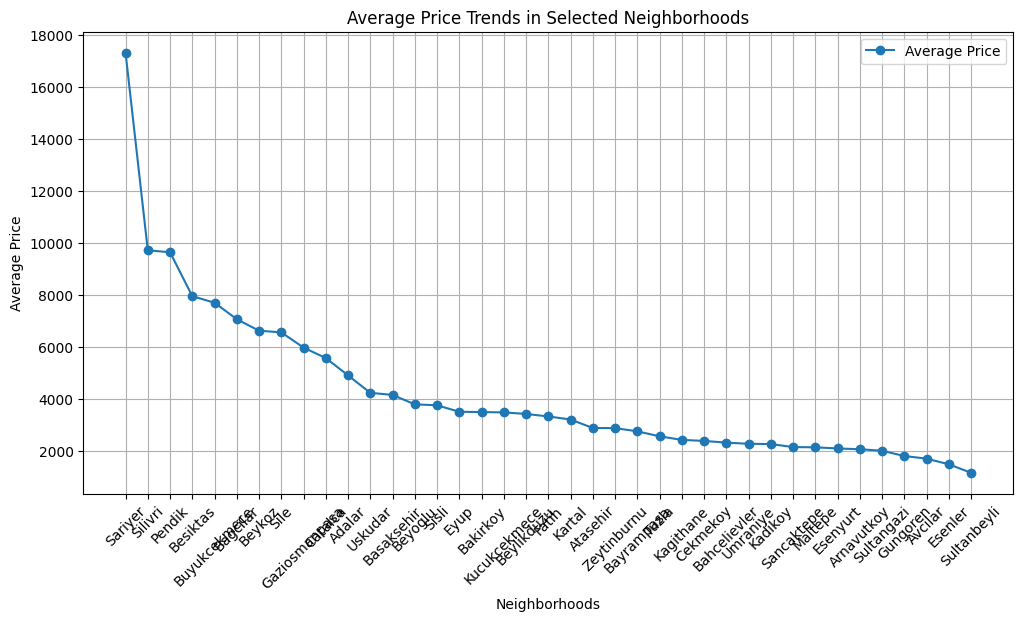

In [10]:
# Plot trends for the selected neighborhoods
plt.figure(figsize=(12, 6))
plt.plot(performance_summary['neighbourhood_cleansed'], performance_summary['average_price'], marker='o', label='Average Price')
plt.title('Average Price Trends in Selected Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Reseñas promedio por mes: Indica la actividad y posible ocupación en estos vecindarios.

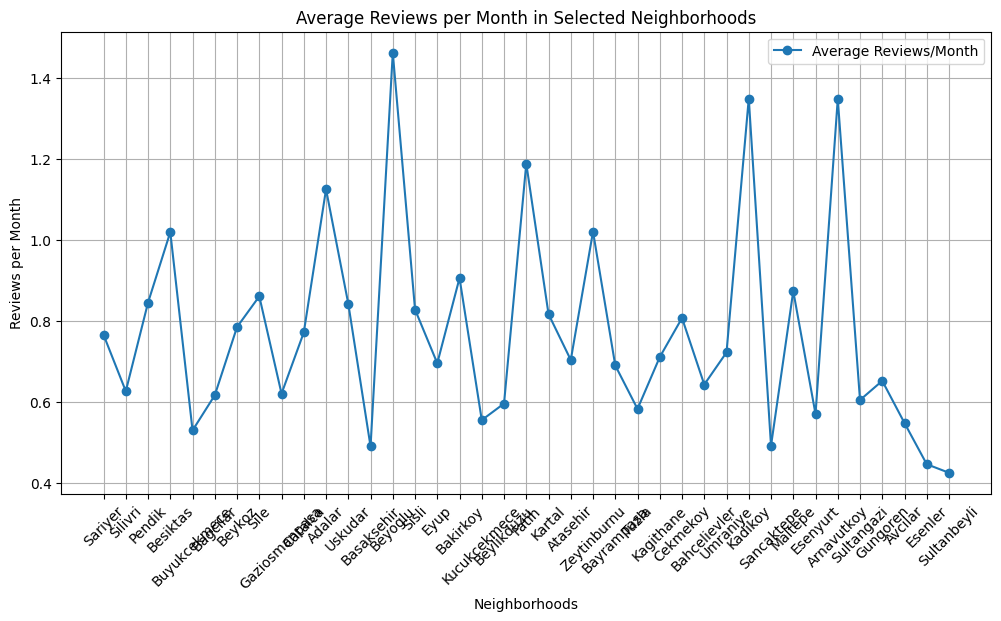

In [11]:
# Reviews per month trend
plt.figure(figsize=(12, 6))
plt.plot(performance_summary['neighbourhood_cleansed'], performance_summary['average_reviews_per_month'], marker='o', label='Average Reviews/Month')
plt.title('Average Reviews per Month in Selected Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Reviews per Month')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Puntuaciones promedio de reseñas: Mide la satisfacción general de los huéspedes.

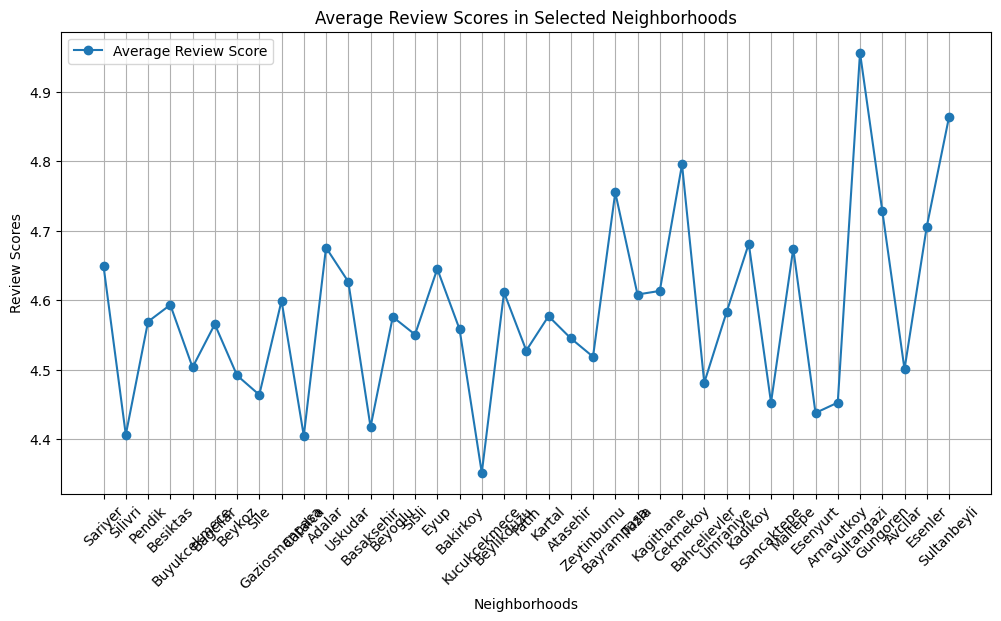

In [12]:
# Review scores trend
plt.figure(figsize=(12, 6))
plt.plot(performance_summary['neighbourhood_cleansed'], performance_summary['average_review_score'], marker='o', label='Average Review Score')
plt.title('Average Review Scores in Selected Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Review Scores')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

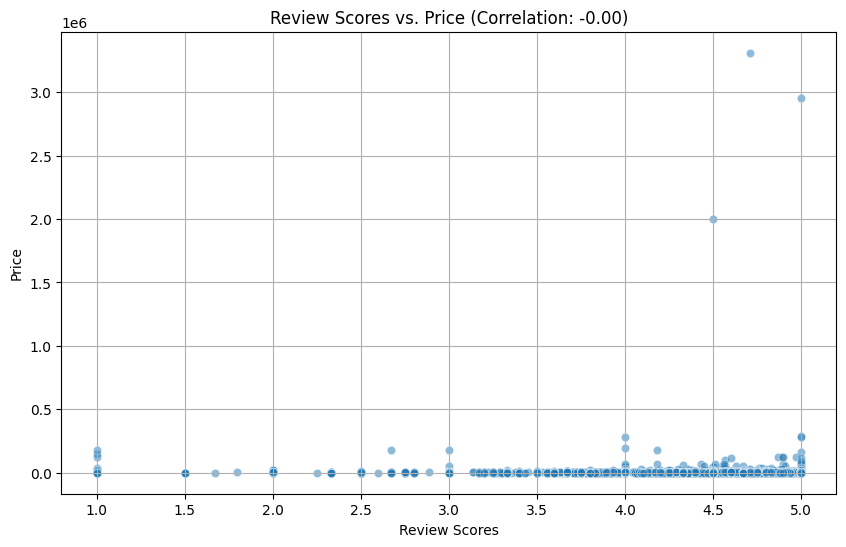

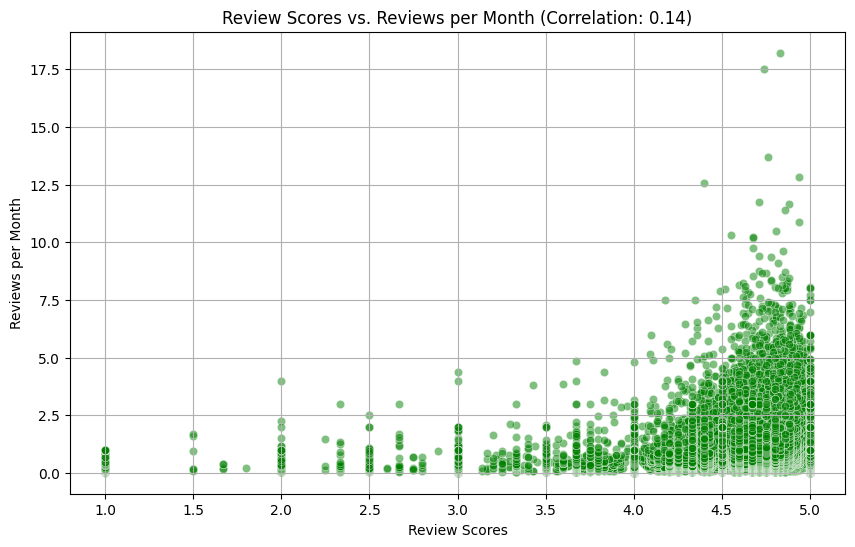

In [13]:
#Como afectan los review scores al revenue

# Create a DataFrame for review analysis
review_analysis_data = listings_detail2[['review_scores_value', 'price', 'reviews_per_month']]

# Calculate correlations
correlation_price_score = review_analysis_data['review_scores_value'].corr(review_analysis_data['price'])
correlation_reviews_score = review_analysis_data['review_scores_value'].corr(review_analysis_data['reviews_per_month'])

# Scatterplot: Review Scores vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=review_analysis_data, x='review_scores_value', y='price', alpha=0.5)
plt.title(f'Review Scores vs. Price (Correlation: {correlation_price_score:.2f})')
plt.xlabel('Review Scores')
plt.ylabel('Price')
plt.grid()
plt.show()

# Scatterplot: Review Scores vs. Reviews per Month
plt.figure(figsize=(10, 6))
sns.scatterplot(data=review_analysis_data, x='review_scores_value', y='reviews_per_month', alpha=0.5, color='green')
plt.title(f'Review Scores vs. Reviews per Month (Correlation: {correlation_reviews_score:.2f})')
plt.xlabel('Review Scores')
plt.ylabel('Reviews per Month')
plt.grid()
plt.show()




In [14]:
#convertir archivo a csv
listings_detail2.to_csv(r'C:\Users\annie\OneDrive\Escritorio\Bootcamp Analisis de Datos\Visual\Módulo 2\Proyecto_M2\listings_detail2_1.csv', index=False)

In [15]:
#Identificar valores duplicados
duplicates = listings_detail2.duplicated()
duplicates.sum()


0

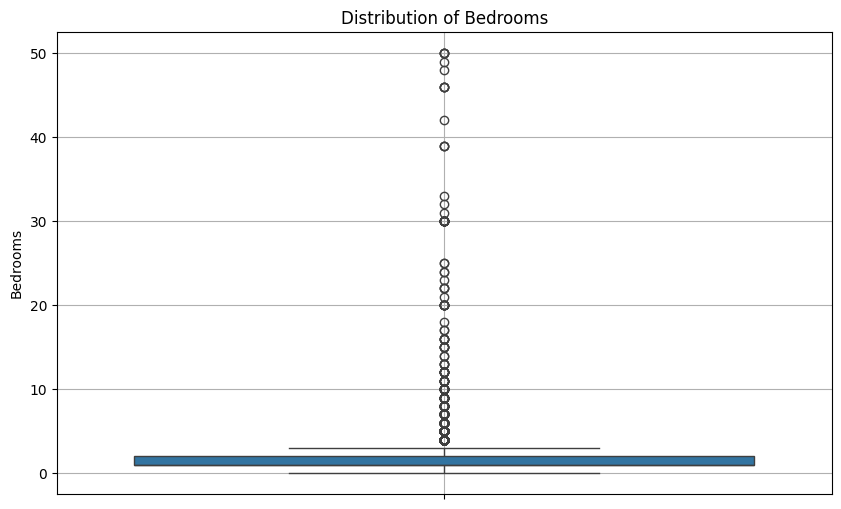

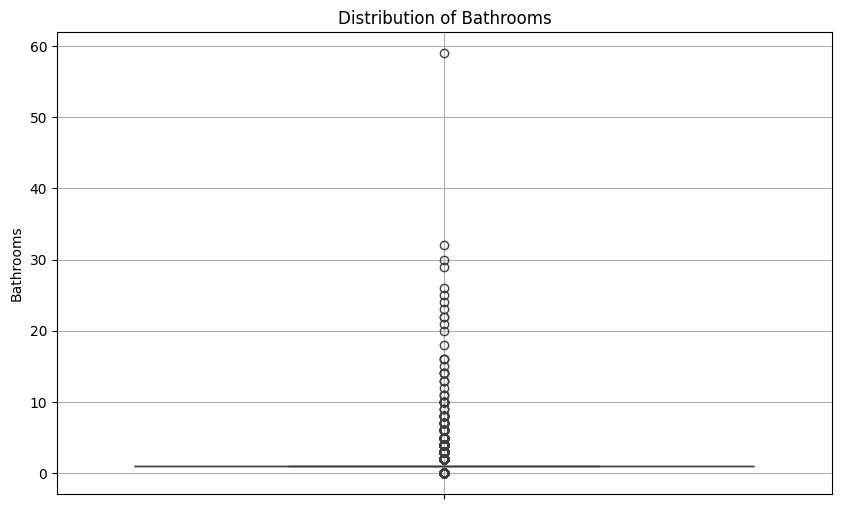

In [16]:
#Identificar valores atipicos en las habitaciones y en baños 
# Detect outliers in 'bedrooms' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=listings_detail2, y='bedrooms')
plt.title('Distribution of Bedrooms')
plt.ylabel('Bedrooms')
plt.grid()
plt.show()

# Detect outliers in 'bathrooms' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=listings_detail2, y='bathrooms')
plt.title('Distribution of Bathrooms')
plt.ylabel('Bathrooms')
plt.grid()
plt.show()


In [17]:
listings_detail2[['bedrooms', 'bathrooms']].describe()


,bedrooms,bathrooms
count,31438.000000,29291.000000
mean,1.525701,1.231436
std,1.636892,0.902409
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,1.000000
max,50.000000,59.000000


In [18]:
# Remove the outliers from the 'bedrooms' and 'bathrooms' colums that are higher than 5 and less than 1 
listings_detail2 = listings_detail2[(listings_detail2['bedrooms'] >= 1) & (listings_detail2['bathrooms'] >= 1)]
listings_detail2 = listings_detail2[(listings_detail2['bedrooms'] <= 5) & (listings_detail2['bathrooms'] <= 5)]

In [19]:
#mostrar valores de bedrooms y bathrooms
listings_detail2[['bedrooms', 'bathrooms']].describe()


,bedrooms,bathrooms
count,27680.000000,27680.00000
mean,1.480816,1.20271
std,0.761672,0.48800
min,1.000000,1.00000
25%,1.000000,1.00000
50%,1.000000,1.00000
75%,2.000000,1.00000
max,5.000000,5.00000


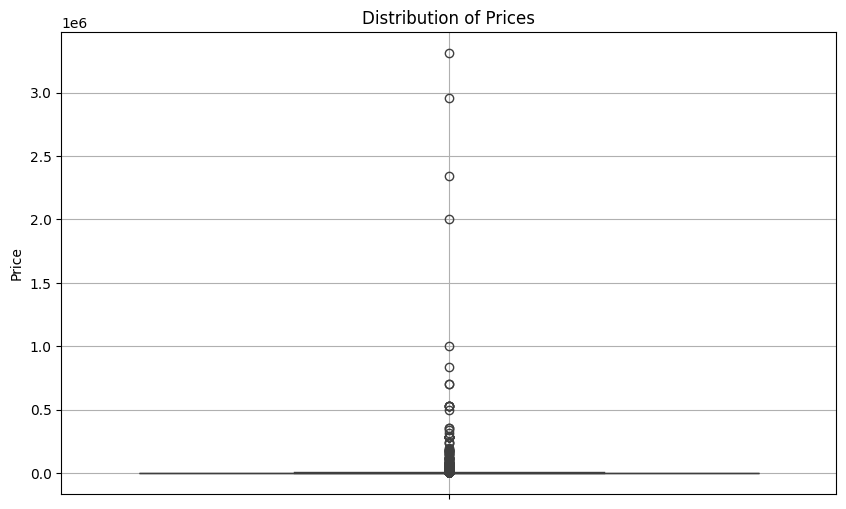

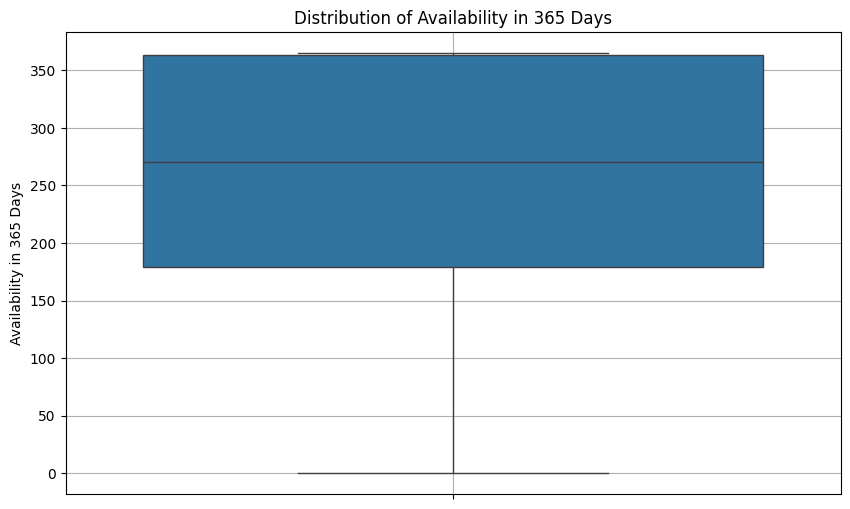

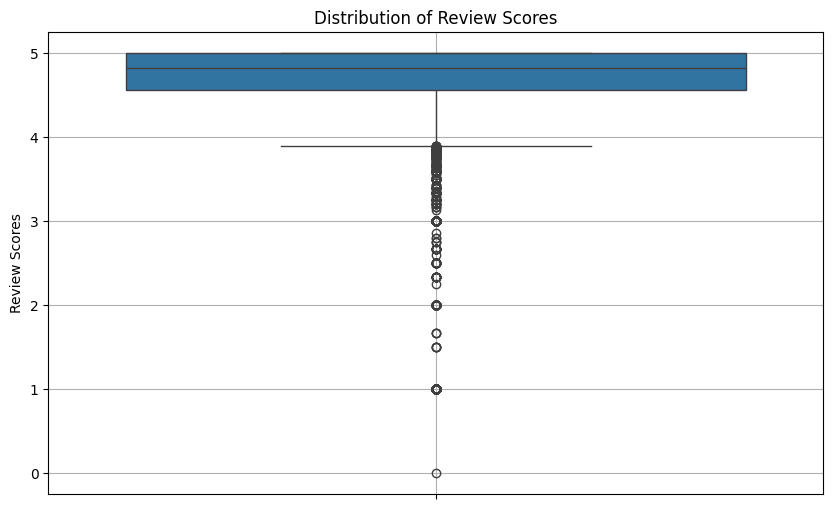

In [20]:
#Outliers: detectar y manejar valores atipicos (Price,availability_365,review_scores_rating)
# Detect outliers in 'price' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=listings_detail2, y='price')
plt.title('Distribution of Prices')
plt.ylabel('Price')
plt.grid()
plt.show()

# Detect outliers in 'availability_365' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=listings_detail2, y='availability_365')
plt.title('Distribution of Availability in 365 Days')
plt.ylabel('Availability in 365 Days')
plt.grid()
plt.show()

# Detect outliers in 'review_scores_rating' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=listings_detail2, y='review_scores_rating')
plt.title('Distribution of Review Scores')
plt.ylabel('Review Scores')
plt.grid()
plt.show()



In [21]:
#Nuevas columnas de clasificacion de propiedades
# Create a new column for property classification based on property type
listings_detail2['property_type_classification'] = 'Other'
listings_detail2.loc[listings_detail2['property_type_classification'].str.contains('Apartment|Condo|Loft|House|Townhouse', case=False), 'property_type_classification'] = 'Residential'
listings_detail2.loc[listings_detail2['property_type_classification'].str.contains('Villa|Cottage|Chalet|Bungalow|Cabin', case=False), 'property_type_classification'] = 'Vacation Home'
listings_detail2.loc[listings_detail2['property_type_classification'].str.contains('Hotel|Hostel|Bed & Breakfast|Guesthouse|Boutique hotel', case=False), 'property_type_classification'] = 'Hospitality'
listings_detail2.loc[listings_detail2['property_type_classification'].str.contains('Boat|Camper/RV|Tent|Treehouse|Yurt', case=False), 'property_type_classification'] = 'Unique'


In [22]:
#Nueva columna con rangos de precios 
# Create a new column for price range classification
listings_detail2['price_range'] = pd.cut(listings_detail2['price'], bins=[0, 50, 100, 150, 200, 250, 300, 500, 1000, 5000], labels=['<50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-500', '500-1000', '1000-5000'])


Analizar propiedades para separar entre propiedaades de lujo y normales

In [23]:
# Calculate basic statistics for price
price_stats = listings_detail2['price'].describe()
price_stats


count    2.757500e+04
mean     3.934259e+03
std      3.610245e+04
min      8.000000e+01
25%      1.285000e+03
50%      2.000000e+03
75%      3.286000e+03
max      3.310226e+06
Name: price, dtype: float64

In [24]:
#valor minimo de precio
min_price = price_stats['min']
min_price



80.0

In [25]:
# Define el tipo de cambio de la lira turca a euros
tipo_cambio_lira_euro = 0.027  # Ejemplo: 1 lira turca = 0.036 euros

# Crear una nueva columna 'price_euro' basada en el tipo de cambio
listings_detail2['price_euro'] = listings_detail2['price'] * tipo_cambio_lira_euro

# Mostrar las primeras filas para verificar
listings_detail2[['price', 'price_euro']].head()

,price,price_euro
1,4108.0,110.916
2,3522.0,95.094
4,1315.0,35.505
5,3874.0,104.598
6,1021.0,27.567


In [26]:
#Max y min de precio en euros
max_price_euro = listings_detail2['price_euro'].max()
min_price_euro = listings_detail2['price_euro'].min()

#Tabla de el top de valores mas altos de precio en euros
top_price_listings = listings_detail2.nlargest(10, 'price_euro')
top_price_listings[['name', 'price_euro']]

#Tabla de el top de valores mas bajos de precio en euros con id, nombre y precio
bottom_price_listings = listings_detail2.nsmallest(10, 'price_euro')
bottom_price_listings[['name','id','price_euro']]



,name,id,price_euro
2103,KENDİ EVİNİZ GİBİİİİ,28909493,2.160
6949,Private bedroom or whole house. 130 Liras only.,52491020,3.645
6049,Evim,50369752,3.780
2940,ALFACAN SUIT,36497583,3.996
1905,ISTANBUL'DA UYGUN ODA,26409062,4.050
4719,"Cheap, Clean and Friendly. For more keep in to...",45587947,4.050
18000,"Ulaşıma yakın,depreme dayanıklı,",879790475907427999,4.617
17198,Çalışan bayan ev arkadaşı,858509885489942276,4.752
2836,"Nice room; open mind, safe, center of istanbul.",35819793,4.860
10632,Located in one of the best sites in Istanbul.,667085615950065656,4.860


In [27]:
# Delete properties that cost less than 10 euros a night
listings_detail2 = listings_detail2[listings_detail2['price_euro'] >= 10]

In [28]:
#Eliminar aquellos valores que en price_euro sean mayores a 2000
listings_detail2 = listings_detail2[listings_detail2['price_euro'] <= 2001]


In [29]:
# Definir nueva columna para diferenciar propiedades lujosas de propiedades normales
listings_detail2['property_type'] = 'Normal'
listings_detail2.loc[listings_detail2['price_euro'] > 250, 'property_type'] = 'Luxury'

# Mostrar las primeras filas para verificar
listings_detail2[['price','price_euro', 'property_type']].head()


,price,price_euro,property_type
1,4108.0,110.916,Normal
2,3522.0,95.094,Normal
4,1315.0,35.505,Normal
5,3874.0,104.598,Normal
6,1021.0,27.567,Normal


In [30]:
#Review 10 properties with highest prices
top_price_listings = listings_detail2.sort_values(by='price', ascending=False).head(10)
top_price_listings[['name', 'price','price_euro','property_type']]

,name,price,price_euro,property_type
30540,Besiktas istambul,72845.0,1966.815,Luxury
13549,Port Galata Suites P4 Teras,71224.0,1923.048,Luxury
23021,"Chic Modern Flat 2 min to Metro, Near Marmara ...",70839.0,1912.653,Luxury
10220,Yesim Suit - Economy Room 19,70430.0,1901.610,Luxury
13894,Taksim'de Lüks Kapalı Teraslı 1+1 Dubleks Daire,70000.0,1890.000,Luxury
2983,Acarkent’e luxs konaklama,69203.0,1868.481,Luxury
7844,DESIGNER VILLA WITH VERY NICE BOSPHORUS VIEW,68670.0,1854.090,Luxury
630,tramway6 flats #4,65729.0,1774.683,Luxury
9109,GREAT 1+1 FLATS IN CENTRAL LOCATION,65000.0,1755.000,Luxury
20577,Denize yakın kiralık 3+1 daire,65000.0,1755.000,Luxury


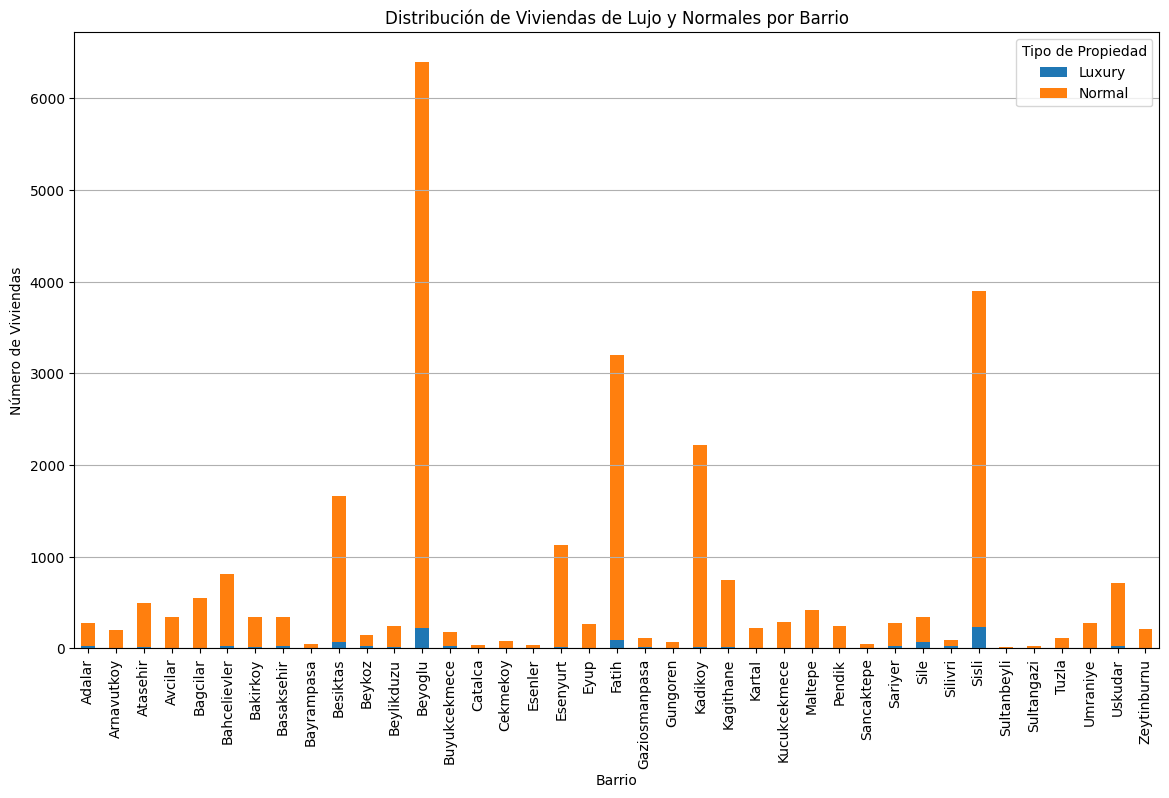

In [31]:
# Agrupar los datos por barrio y tipo de propiedad
property_distribution = listings_detail2.groupby(['neighbourhood_cleansed', 'property_type']).size().unstack().fillna(0)

# Crear el gráfico de barras apiladas
property_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Distribución de Viviendas de Lujo y Normales por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Número de Viviendas')
plt.xticks(rotation=90)
plt.legend(title='Tipo de Propiedad')
plt.grid(axis='y')
plt.show()

In [32]:
# Filter only luxury properties
luxury_properties = listings_detail2[listings_detail2['property_type'] == 'Luxury']

# Group by neighborhood and count luxury properties
luxury_by_neighborhood = luxury_properties.groupby('neighbourhood_cleansed').size().sort_values(ascending=False)

# Display top neighborhoods with the highest number of luxury properties
luxury_by_neighborhood.head(10)

neighbourhood_cleansed
Sisli           231
Beyoglu         219
Fatih            88
Besiktas         74
Sile             68
Bahcelievler     30
Sariyer          27
Adalar           27
Basaksehir       24
Silivri          22
dtype: int64

In [33]:
# Analyze the price statistics for both luxury and normal properties
normal_properties = listings_detail2[listings_detail2['property_type'] == 'Normal']

normal_price_stats = normal_properties['price_euro'].describe()
luxury_vs_normal_stats = pd.DataFrame({
    'Luxury Properties': luxury_properties['price_euro'].describe(),
    'Normal Properties': normal_properties['price_euro'].describe()
})

from IPython.display import display


luxury_vs_normal_stats


,Luxury Properties,Normal Properties
count,1045.000000,26047.000000
mean,453.941931,65.987097
std,282.987943,45.244013
min,250.101000,10.017000
25%,284.283000,34.722000
50%,354.942000,54.000000
75%,478.278000,83.700000
max,1966.815000,249.183000


Comparacion de precios por barrio para propiedades luxury y normales


In [34]:
# Group both luxury and normal properties by neighborhood to calculate average price
luxury_avg_price_by_neighborhood = luxury_properties.groupby('neighbourhood_cleansed')['price_euro'].mean().sort_values(ascending=False)
normal_avg_price_by_neighborhood = normal_properties.groupby('neighbourhood_cleansed')['price_euro'].mean().sort_values(ascending=False)

# Combine the results for comparison
location_comparison = pd.DataFrame({
    'Luxury Avg Price': luxury_avg_price_by_neighborhood,
    'Normal Avg Price': normal_avg_price_by_neighborhood
}).fillna(0).sort_values(by=['Luxury Avg Price', 'Normal Avg Price'], ascending=False)

# Display the top neighborhoods for comparison
from IPython.display import display

location_comparison.head(10)


,Luxury Avg Price,Normal Avg Price
neighbourhood_cleansed,,
Kartal,777.546000,62.617898
Kucukcekmece,714.177000,48.592436
Silivri,671.426182,99.714086
Esenyurt,595.354154,48.116632
Maltepe,594.803250,45.589790
Gaziosmanpasa,574.304727,64.911897
Fatih,550.026205,66.742644
Sariyer,547.832000,83.966570
Eyup,547.668000,59.483930


In [36]:
#Normalizacion de texto 
# Uniformizar cadenas de texto en las columnas 'property_type', 'room_type' y 'host_response_time'
listings_detail2['property_type'] = listings_detail2['property_type'].str.strip().str.lower()
listings_detail2['room_type'] = listings_detail2['room_type'].str.strip().str.lower()
listings_detail2['host_response_time'] = listings_detail2['host_response_time'].str.strip().str.lower()

In [37]:
# Generar resumen estadístico para variables clave
key_variables_summary = listings_detail2[['price_euro', 'review_scores_value', 'reviews_per_month']].describe()
key_variables_summary

,price_euro,review_scores_value,reviews_per_month
count,27092.000000,17014.000000,17037.000000
mean,80.951397,4.595964,1.141704
std,103.130583,0.610964,1.268890
min,10.017000,1.000000,0.010000
25%,35.505000,4.500000,0.250000
50%,55.012500,4.750000,0.700000
75%,88.722000,5.000000,1.620000
max,1966.815000,5.000000,18.220000


In [38]:
#Determinar columnas categoricas y numericas
categorical_columns = listings_detail2.select_dtypes(include=['object']).columns
numerical_columns = listings_detail2.select_dtypes(include=['float', 'int']).columns


In [39]:
#Rellenar valores numericos faltantes con la media
numeric_columns = listings_detail2.select_dtypes(include=[np.number]).columns
listings_detail2[numeric_columns] = listings_detail2[numeric_columns].fillna(listings_detail2[numeric_columns].mean())


In [40]:
#Rellenar valores categoricos con "Sin especificar"
categorical_columns = listings_detail2.select_dtypes(include=['object']).columns
listings_detail2[categorical_columns] = listings_detail2[categorical_columns].fillna('Not specified')


In [41]:
#Precios promedio por noche 
# Create new column that calculates the average price per night 
listings_detail2['average_price_per_night'] = listings_detail2['price_euro'] / listings_detail2['minimum_nights']

# Display the first few rows of the updated DataFrame
listings_detail2[['price_euro', 'minimum_nights', 'average_price_per_night']].head()


,price_euro,minimum_nights,average_price_per_night
1,110.916,3,36.972000
2,95.094,2,47.547000
4,35.505,10,3.550500
5,104.598,28,3.735643
6,27.567,360,0.076575


In [42]:
# Eliminar filas con valores NaN en la columna 'price'
listings_detail2.dropna(subset=['price'], inplace=True)

# Verificar que las filas con NaN en 'price' han sido eliminadas
listings_detail2['price'].isna().sum()

0

In [43]:
#Nueva columna de ocupacion anual
# Create a new column for annual occupancy rate
listings_detail2['annual_occupancy_rate'] = (365 - listings_detail2['availability_365']) / 365


In [44]:
listings_detail2['neighbourhood_cleansed'].unique()

array(['Sariyer', 'Fatih', 'Besiktas', 'Beyoglu', 'Sisli', 'Kadikoy',
       'Beykoz', 'Uskudar', 'Beylikduzu', 'Adalar', 'Basaksehir',
       'Bagcilar', 'Gaziosmanpasa', 'Gungoren', 'Bahcelievler',
       'Kagithane', 'Esenyurt', 'Bakirkoy', 'Kartal', 'Zeytinburnu',
       'Maltepe', 'Umraniye', 'Atasehir', 'Tuzla', 'Eyup', 'Sile',
       'Avcilar', 'Pendik', 'Arnavutkoy', 'Sancaktepe', 'Bayrampasa',
       'Sultangazi', 'Cekmekoy', 'Sultanbeyli', 'Buyukcekmece', 'Catalca',
       'Kucukcekmece', 'Silivri', 'Esenler'], dtype=object)

In [45]:
#mostrar valores de bedrooms y bathrooms
listings_detail2[['bedrooms', 'bathrooms']].describe()

,bedrooms,bathrooms
count,27092.000000,27092.000000
mean,1.484903,1.202458
std,0.763321,0.487658
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,1.000000
max,5.000000,5.000000


In [46]:
#transformar a csv
listings_detail2.to_csv(r'C:\Users\annie\OneDrive\Escritorio\Bootcamp Analisis de Datos\Visual\Módulo 2\Proyecto_M2\listings_detail2_3.csv', index=False)

In [47]:
# buscar no. baños y camas del id 28318
listings_detail2.loc[listings_detail2['id'] == 28318, ['price', 'price_euro']]


,price,price_euro
1,4108.0,110.916


In [48]:
#Calcular valores unicos de beds
unique_beds = listings_detail2['beds'].unique()
unique_beds


array([ 2.       ,  3.       ,  4.       ,  1.       ,  5.       ,
        0.       ,  6.       ,  8.       ,  9.       ,  7.       ,
       16.       , 10.       , 11.       , 14.       , 12.       ,
        1.8706753, 13.       , 15.       , 19.       , 21.       ])

In [49]:
#Mostrar todas aquellas lineas que tienen valor 0 en beds
listings_detail2[listings_detail2['beds'] == 0]


,id,last_scraped,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,reviews_per_month,property_type_classification,price_range,price_euro,average_price_per_night,annual_occupancy_rate
78,791977,2024-06-30,city scrape,Ground Floor 2+1 @ TAKSIM Very Touristic,Not specified,Not specified,4172454,Safa,2012-11-17,"Istanbul, Turkey",...,4.595964,Not specified,t,13,1.141704,Other,1000-5000,88.425,44.2125,0.942466
266,2196825,2024-06-30,city scrape,Near the new Istanbul airport and see side.,"Hello, our house is very close Renaissance Pol...","It is very close to the beach, shopping center...",2309765,Ertug,2012-05-07,"Istanbul, Turkey",...,4.760000,Not specified,f,2,0.140000,Other,1000-5000,29.700,29.7000,0.005479
278,2251864,2024-06-30,city scrape,Cosy rooftop studio,"Cosy rooftop studio, a big terrace with a city...",Not specified,11501164,Özge,2014-01-21,Not specified,...,4.595964,Not specified,f,1,1.141704,Other,1000-5000,47.547,47.5470,0.761644
547,5009749,2024-06-30,city scrape,"Family App,ground floor,Aksaray(3+1","Ground floor,entire three bedrooms app,110m ,n...","close to all facility,",25836714,Fathalla,2015-01-09,Not specified,...,3.000000,Not specified,f,2,0.020000,Other,1000-5000,66.555,13.3110,0.019178
855,6483048,2024-06-30,city scrape,Majestic place for families,Our cool and comfortable one bedroom apartment...,Our apartment is close to most attractive hist...,15409940,Huseyin,2014-05-12,"Miami, FL",...,4.380000,Exempt,t,6,0.070000,Other,1000-5000,73.386,36.6930,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30912,1177371563481067070,2024-06-30,city scrape,311 - Double,"In our double rooms, which offer a larger and ...",Not specified,582616724,Yalda,2024-06-10,Not specified,...,4.595964,Exempt,t,60,1.141704,Other,1000-5000,88.695,88.6950,0.432877
30916,1177382203909683513,2024-06-30,city scrape,310 - Suite,Frezya Hotel's Deluxe Suite offers unparallele...,Not specified,582616724,Yalda,2024-06-10,Not specified,...,4.595964,Exempt,t,60,1.141704,Other,1000-5000,114.642,114.6420,0.432877
31610,1188199275373176018,2024-06-30,city scrape,110- Suite,Creating a whole new world exclusively for wom...,Not specified,582616724,Yalda,2024-06-10,Not specified,...,4.595964,Exempt,t,60,1.141704,Other,1000-5000,135.000,135.0000,0.441096
31624,1188207719440144398,2024-06-30,city scrape,115 - Suite,"Creating a whole new world for women only, the...",Not specified,582616724,Yalda,2024-06-10,Not specified,...,4.595964,Exempt,t,60,1.141704,Other,1000-5000,135.000,135.0000,0.441096


In [51]:
#menor precio por noche en euros
min_price_per_night = listings_detail2['price_euro'].min()
min_price_per_night


10.017